In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
data = pd.read_csv('worksheet_graphs - Sheet1.csv')

#### I was looking to make a sort of graph where you can see the number of accidents that happened during the day on an hourly basis, so like hour (0-24) on the x axis and the number of accidents reported in that hour on th ey-axis

#### Another one was similar but based on the months during which accidents happened

In [28]:
from datetime import datetime
def convert_time(time_str):
    try:
        return pd.to_datetime(time_str).hour
    except:
        return -1





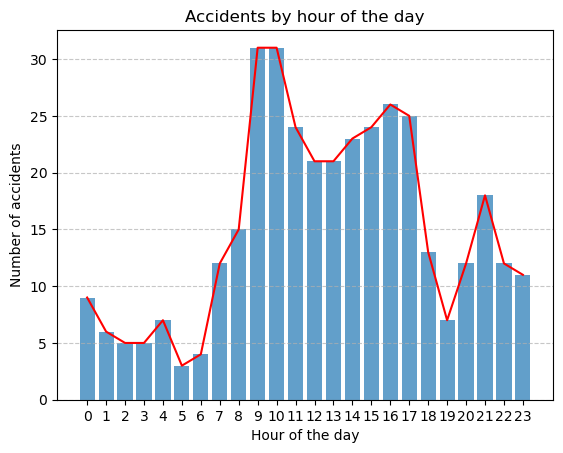

In [29]:
data['hour_of_accident'] = data['Time'].apply(convert_time)
filtered_data = data[data['hour_of_accident'] != -1]
hour_counts = filtered_data['hour_of_accident'].value_counts().sort_index()
hours = hour_counts.index
count = hour_counts.values



plt.plot(hours, count, color = 'red')
plt.xlabel('Hour of the day')
plt.ylabel('Number of accidents')
plt.xticks(hours)
plt.title('Accidents by hour of the day')

plt.bar(hours, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()


In [30]:
from datetime import datetime
def convert_time_to_month(time_str):
    try:
        return pd.to_datetime(time_str).month
    except:
        return -1


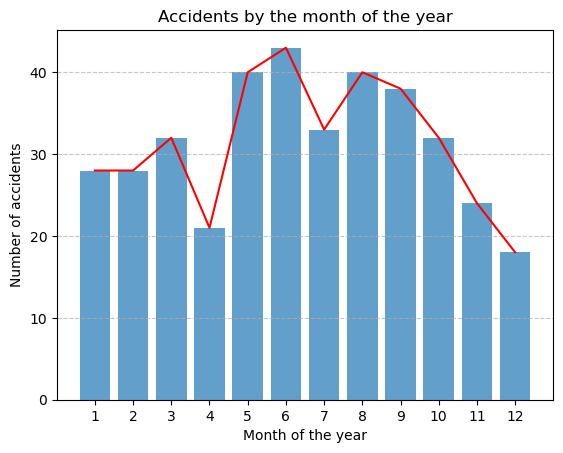

In [31]:
data['month_of_accident'] = data['Date'].apply(convert_time_to_month)
filtered_data = data[data['month_of_accident'] != -1]
month_counts = filtered_data['month_of_accident'].value_counts().sort_index()
months = month_counts.index
count = month_counts.values



plt.plot(months, count, color = 'red')
plt.xlabel('Month of the year')
plt.ylabel('Number of accidents')
plt.xticks(months)
plt.title('Accidents by the month of the year')

plt.bar(months, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()

In [32]:
def convert_time_to_week(time_str):
    try:
        
        return pd.to_datetime(time_str).weekday()
    except:
        return -1
    
def day(day_num):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days_of_week[day_num]

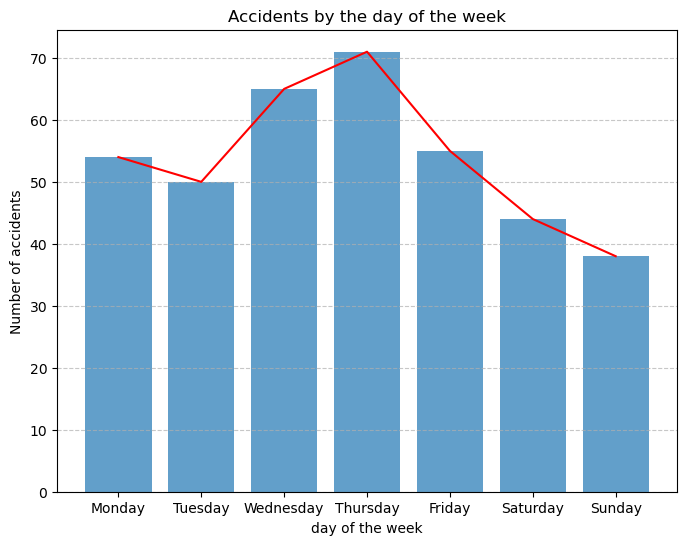

In [33]:
data['day_of_accident'] = data['Date'].apply(convert_time_to_week)
filtered_data = data[data['day_of_accident'] != -1]
day_counts = filtered_data['day_of_accident'].value_counts().sort_index()
days = day_counts.index.map(day)
count = day_counts.values

plt.figure(figsize=(8, 6))

plt.plot(days, count, color = 'red')
plt.xlabel('day of the week')
plt.ylabel('Number of accidents')
plt.xticks(days)
plt.title('Accidents by the day of the week')

plt.bar(days, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

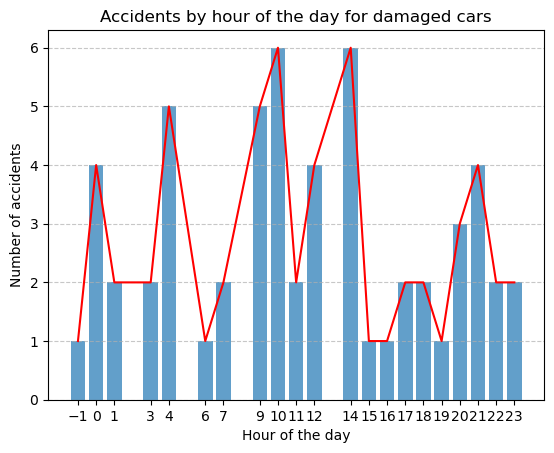

In [34]:
# do the same two graphs before but we use data if the vehicle damage if 
# it is major/moderate or minor/none
damage_cars = data[(data['Vehicle Damage'] == 'Major') | (data['Vehicle Damage'] == 'Moderate')]

damage_cars.loc[:,'hour_of_accident'] = damage_cars['Time'].apply(convert_time)
hour_counts = damage_cars['hour_of_accident'].value_counts().sort_index()
hours = hour_counts.index
count = hour_counts.values



plt.plot(hours, count, color = 'red')
plt.xlabel('Hour of the day')
plt.ylabel('Number of accidents')
plt.xticks(hours)
plt.title('Accidents by hour of the day for damaged cars')

plt.bar(hours, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()





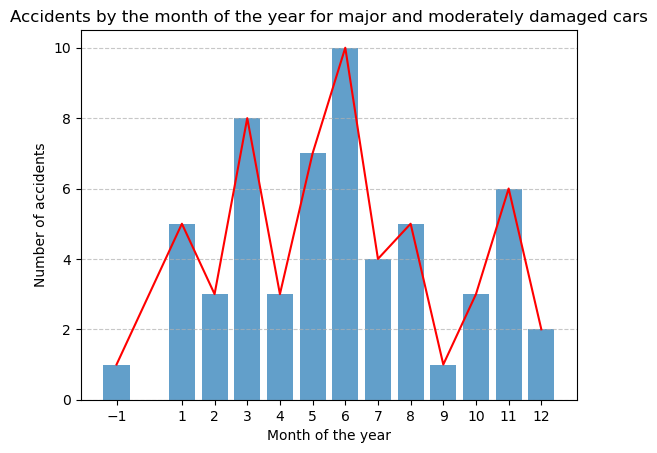

In [35]:
damage_cars.loc[:, 'month_of_accident'] = damage_cars['Date'].apply(convert_time_to_month)
month_counts = damage_cars['month_of_accident'].value_counts().sort_index()
months = month_counts.index
count = month_counts.values



plt.plot(months, count, color = 'red')
plt.xlabel('Month of the year')
plt.ylabel('Number of accidents')
plt.xticks(months)
plt.title('Accidents by the month of the year for major and moderately damaged cars')

plt.bar(months, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
minor_damage_cars = data[(data['Vehicle Damage'] == 'Minor')| (data['Vehicle Damage'] == 'None')]

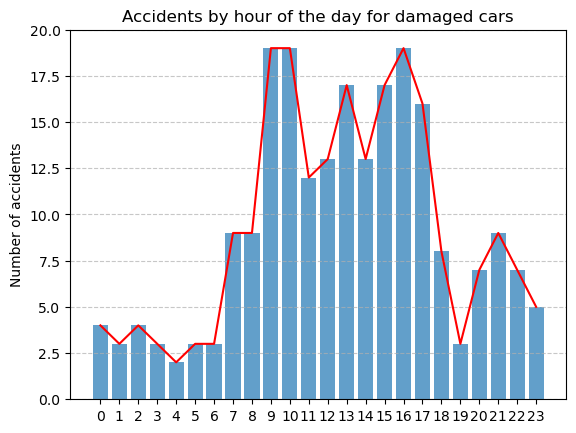

In [37]:

minor_damage_cars.loc[:,'hour_of_accident'] = minor_damage_cars['Time'].apply(convert_time)
hour_counts = minor_damage_cars['hour_of_accident'].value_counts().sort_index()
hours = hour_counts.index
count = hour_counts.values



plt.plot(hours, count, color = 'red')
plt.ylabel('Number of accidents')
plt.xticks(hours)
plt.title('Accidents by hour of the day for damaged cars')
plt.ylim(0,20)

plt.bar(hours, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()


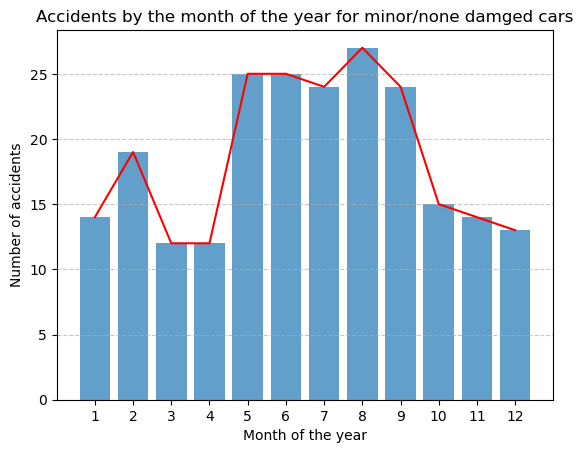

In [38]:
minor_damage_cars.loc[:,'month_of_accident'] = minor_damage_cars['Date'].apply(convert_time_to_month)
month_counts = minor_damage_cars['month_of_accident'].value_counts().sort_index()
months = month_counts.index
count = month_counts.values



plt.plot(months, count, color = 'red')
plt.xlabel('Month of the year')
plt.ylabel('Number of accidents')
plt.xticks(months)
plt.title('Accidents by the month of the year for minor/none damged cars')

plt.bar(months, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
ADAS_data = pd.read_csv('california_data/NHTSA _SGO_incident_reports/SGO-2021-01_Incident_Reports_ADAS.csv')
ADS_data = pd.read_csv('california_data/NHTSA _SGO_incident_reports/SGO-2021-01_Incident_Reports_ADS.csv')

combined_data = pd.concat([ADAS_data, ADS_data])



In [40]:
ADAS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Columns: 137 entries, Report ID to Narrative - CBI?
dtypes: float64(9), int64(2), object(126)
memory usage: 1.2+ MB


In [41]:
ADS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Columns: 137 entries, Report ID to Narrative - CBI?
dtypes: float64(6), int64(1), object(130)
memory usage: 752.6+ KB


In [42]:
def convert_month_to_num(month_str):
    try:
        months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        return months.index(month_str[:3].lower()) + 1
    except:
        return -1

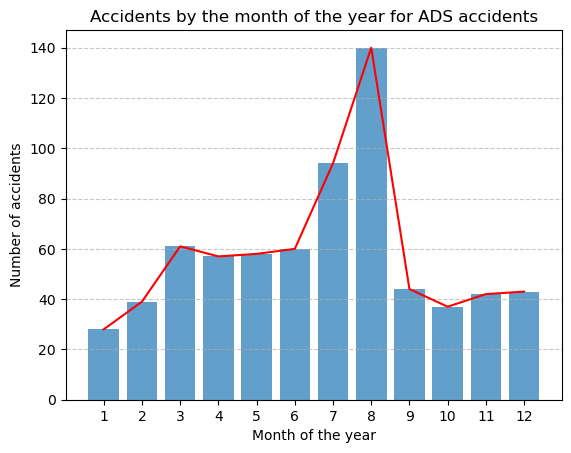

In [43]:
# get the months of the accidents
ADS_data['month_of_accident'] = ADS_data['Incident Date'].apply(convert_month_to_num)
filtered_data = ADS_data[ADS_data['month_of_accident'] != -1]
month_counts = filtered_data['month_of_accident'].value_counts().sort_index()
months = month_counts.index
count = month_counts.values

plt.plot(months, count, color = 'red')
plt.xlabel('Month of the year')
plt.ylabel('Number of accidents')
plt.xticks(months)
plt.title('Accidents by the month of the year for ADS accidents')

plt.bar(months, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

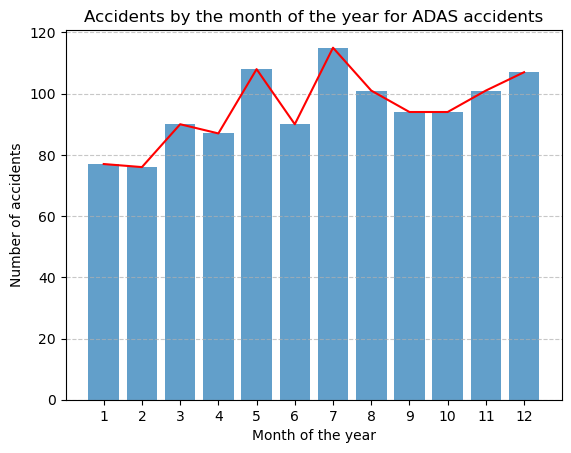

In [44]:
# get the months of the accidents
ADAS_data['month_of_accident'] = ADAS_data['Incident Date'].apply(convert_month_to_num)
filtered_data = ADAS_data[ADAS_data['month_of_accident'] != -1]
month_counts = filtered_data['month_of_accident'].value_counts().sort_index()
months = month_counts.index
count = month_counts.values

plt.plot(months, count, color = 'red')
plt.xlabel('Month of the year')
plt.ylabel('Number of accidents')
plt.xticks(months)
plt.title('Accidents by the month of the year for ADAS accidents')

plt.bar(months, count, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [45]:
print(list(ADAS_data.columns))

['Report ID', 'Report Version', 'Reporting Entity', 'Report Type', 'Report Month', 'Report Year', 'Report Submission Date', 'VIN', 'VIN - Unknown', 'Serial Number', 'Make', 'Model', 'Model - Unknown', 'Model Year', 'Model Year - Unknown', 'Same Vehicle ID', 'Mileage', 'Mileage - Unknown', 'Driver / Operator Type', 'ADAS/ADS System Version', 'ADAS/ADS System Version - Unk', 'ADAS/ADS System Version CBI', 'ADAS/ADS Hardware Version', 'ADAS/ADS Hardware Version - Unk', 'ADAS/ADS Hardware Version CBI', 'ADAS/ADS Software Version', 'ADAS/ADS Software Version - Unk', 'ADAS/ADS Software Version CBI', 'Other Reporting Entities?', 'Other Reporting Entities? - Unk', 'Other Reporting Entities? - NA', 'Federal Regulatory Exemption?', 'Other Federal Reg. Exemption', 'Federal Reg. Exemption - Unk', 'Federal Reg. Exemption - No', 'State or Local Permit?', 'State or Local Permit', 'ADS Equipped?', 'Automation System Engaged?', 'Operating Entity', 'Operating Entity - Unknown', 'Source - Complaint/Claim

In [46]:
ADAS_data['Posted Speed Limit (MPH)']

0        NaN
1       70.0
2       65.0
3        NaN
4       55.0
        ... 
1149    65.0
1150     NaN
1151    65.0
1152    65.0
1153    65.0
Name: Posted Speed Limit (MPH), Length: 1154, dtype: float64

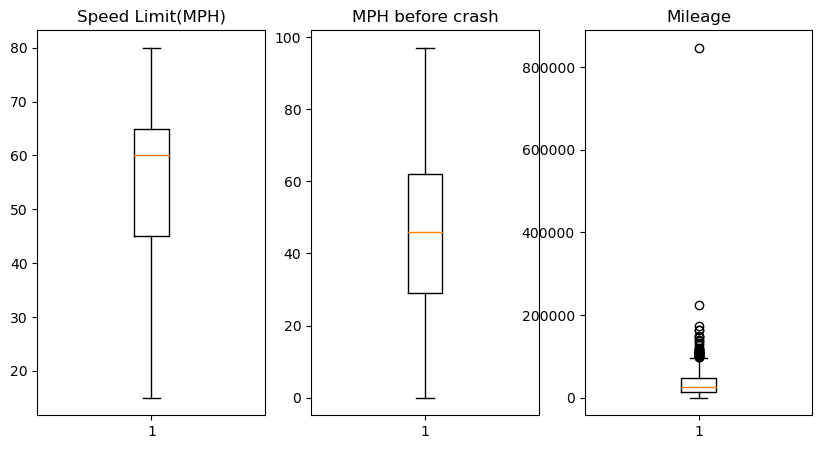


Statistics for 'Posted Speed Limit (MPH)':
count    885.000000
mean      56.378531
std       12.497429
min       15.000000
25%       45.000000
50%       60.000000
75%       65.000000
max       80.000000
Name: Posted Speed Limit (MPH), dtype: float64

Statistics for 'SV Precrash Speed (MPH)':
count    937.000000
mean      45.181430
std       20.927101
min        0.000000
25%       29.000000
50%       46.000000
75%       62.000000
max       97.000000
Name: SV Precrash Speed (MPH), dtype: float64


In [47]:
# average miles per hour before crash

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].boxplot(ADAS_data['Posted Speed Limit (MPH)'].dropna())
axs[0].set_title('Speed Limit(MPH)')

# Box plot for data2
axs[1].boxplot(ADAS_data['SV Precrash Speed (MPH)'].dropna())
axs[1].set_title('MPH before crash')

axs[2].boxplot(ADAS_data['Mileage'].dropna())
axs[2].set_title('Mileage')

plt.show()

print("\nStatistics for 'Posted Speed Limit (MPH)':")
print(ADAS_data['Posted Speed Limit (MPH)'].describe())

# Print statistics for 'SV Precrash Speed (MPH)' column
print("\nStatistics for 'SV Precrash Speed (MPH)':")
print(ADAS_data['SV Precrash Speed (MPH)'].describe())



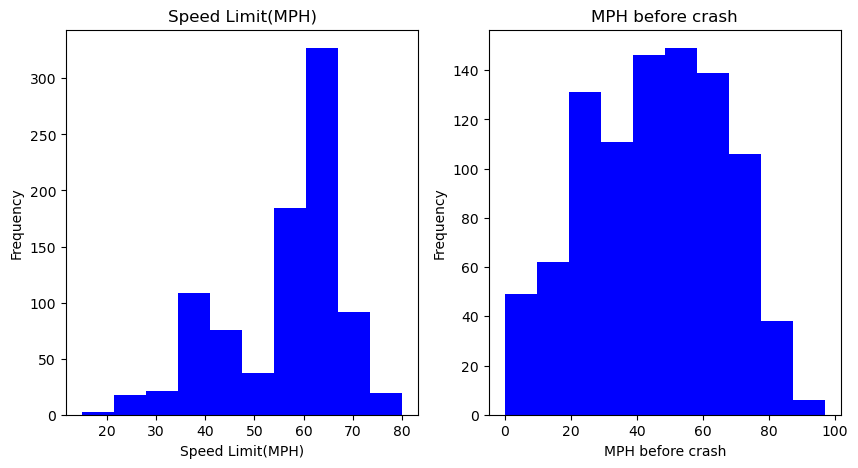

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

counts, bins = np.histogram(ADAS_data['Posted Speed Limit (MPH)'].dropna())
axs[0].hist(bins[:-1], bins, weights=counts, histtype = 'barstacked', color = 'blue')
axs[0].set_title('Speed Limit(MPH)')
axs[0].set_xlabel('Speed Limit(MPH)')
axs[0].set_ylabel('Frequency')

# Box plot for data2
counts, bins = np.histogram(ADAS_data['SV Precrash Speed (MPH)'].dropna())

axs[1].hist(bins[:-1], bins, weights=counts, histtype = 'barstacked', color = 'blue')
axs[1].set_title('MPH before crash')
axs[1].set_xlabel('MPH before crash')
axs[1].set_ylabel('Frequency')

plt.show()




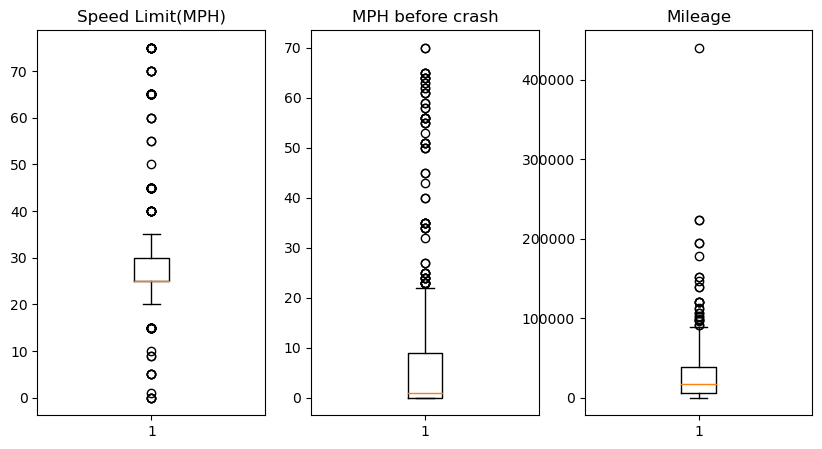


Statistics for 'Posted Speed Limit (MPH)':
count    688.000000
mean      29.206395
std       11.993126
min        0.000000
25%       25.000000
50%       25.000000
75%       30.000000
max       75.000000
Name: Posted Speed Limit (MPH), dtype: float64

Statistics for 'SV Precrash Speed (MPH)':
count    692.000000
mean       8.091040
std       14.482849
min        0.000000
25%        0.000000
50%        1.000000
75%        9.000000
max       70.000000
Name: SV Precrash Speed (MPH), dtype: float64


In [49]:
# average miles per hour before crash

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].boxplot(ADS_data['Posted Speed Limit (MPH)'].dropna())
axs[0].set_title('Speed Limit(MPH)')

# Box plot for data2
axs[1].boxplot(ADS_data['SV Precrash Speed (MPH)'].dropna())
axs[1].set_title('MPH before crash')

axs[2].boxplot(ADS_data['Mileage'].dropna())
axs[2].set_title('Mileage')

plt.show()

print("\nStatistics for 'Posted Speed Limit (MPH)':")
print(ADS_data['Posted Speed Limit (MPH)'].describe())

# Print statistics for 'SV Precrash Speed (MPH)' column
print("\nStatistics for 'SV Precrash Speed (MPH)':")
print(ADS_data['SV Precrash Speed (MPH)'].describe())



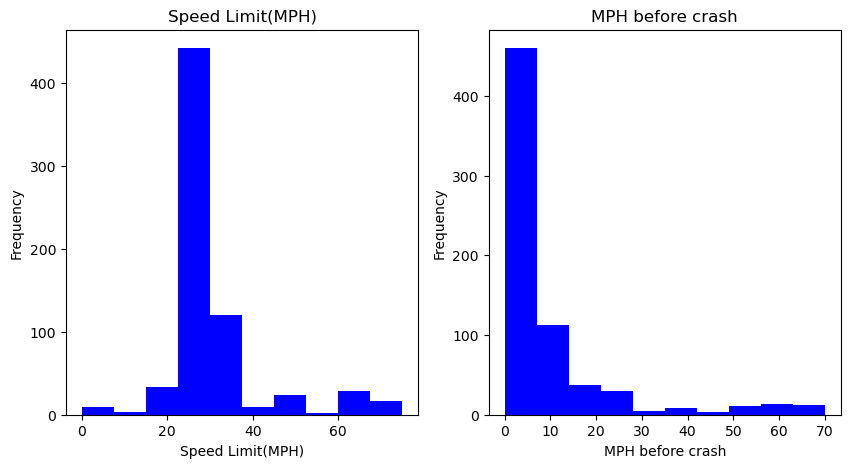

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

counts, bins = np.histogram(ADS_data['Posted Speed Limit (MPH)'].dropna())
axs[0].hist(bins[:-1], bins, weights=counts, histtype = 'barstacked', color = 'blue')
axs[0].set_title('Speed Limit(MPH)')
axs[0].set_xlabel('Speed Limit(MPH)')
axs[0].set_ylabel('Frequency')

# Box plot for data2
counts, bins = np.histogram(ADS_data['SV Precrash Speed (MPH)'].dropna())

axs[1].hist(bins[:-1], bins, weights=counts, histtype = 'barstacked', color = 'blue')
axs[1].set_title('MPH before crash')
axs[1].set_xlabel('MPH before crash')
axs[1].set_ylabel('Frequency')

plt.show()

In [58]:
print(ADS_data['Driver / Operator Type'].value_counts())

Driver / Operator Type
In-Vehicle (Commercial / Test)               390
Remote (Commercial / Test)                   196
In-Vehicle and Remote (Commercial / Test)     51
Consumer                                       8
Other, see Narrative                           7
Unknown                                        1
Name: count, dtype: int64


In [59]:
print(ADS_data['Report Submission Date'].value_counts())

Report Submission Date
SEP-2023    61
AUG-2023    56
APR-2023    49
JUL-2023    45
SEP-2022    35
JUN-2023    32
MAY-2023    32
NOV-2021    31
AUG-2022    31
JUN-2022    29
MAR-2023    27
SEP-2021    25
DEC-2022    23
MAY-2022    23
APR-2022    23
DEC-2021    22
JUL-2022    21
OCT-2022    19
JAN-2022    18
OCT-2021    17
FEB-2022    17
MAR-2022    14
JAN-2023    14
AUG-2021    13
FEB-2023    12
NOV-2022    11
JUL-2021     3
Name: count, dtype: int64
